In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [6]:
x = tf.constant(3.0)
w1 = tf.constant(2.0)
b1 = tf.constant(1.0)
w2 = tf.constant(5.0)
b2 = tf.constant(1.0)

In [7]:
with tf.GradientTape(persistent=True) as tape:
    tape.watch([w1, b1, w2, b2])
    y1 = x * w1 + b1
    y2 = y1 * w2 + b2
    dy2_dy1 = tape.gradient(y2, [y1])[0]
    dy1_dw1 = tape.gradient(y1, [w1])[0]
    dy2_dw1 = tape.gradient(y2, [w1])[0]
    
    print(dy2_dy1 * dy1_dw1)
    print(dy2_dw1)

tf.Tensor(15.0, shape=(), dtype=float32)
tf.Tensor(15.0, shape=(), dtype=float32)


In [8]:
def himmelblau(args):
    x, y = args
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

In [10]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
X,Y = np.meshgrid(x, y)
Z = himmelblau([X,Y])

Text(0.5,0,'y')

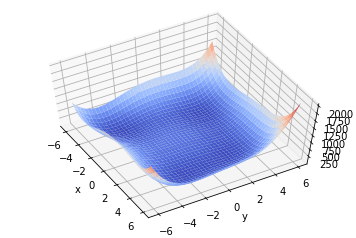

In [18]:
fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')

In [22]:
# (3,2), (−2.805, 3.131), (−3.779, −3.283), (3.584, −1.848)
x = tf.constant([-2.,0.])
for step in range(200):
    with tf.GradientTape() as tape:
        tape.watch([x])
        y = himmelblau(x)
        grads = tape.gradient(y, [x])[0]
        x -= 0.01 * grads
        if step % 20 == 19:
            print(f'step {step}: x = {x.numpy()}, f(x) = {y.numpy()}')

step 19: x = [-2.8051178  3.1313124], f(x) = 8.185452315956354e-12
step 39: x = [-2.805118   3.1313124], f(x) = 2.2737367544323206e-13
step 59: x = [-2.805118   3.1313124], f(x) = 2.2737367544323206e-13
step 79: x = [-2.805118   3.1313124], f(x) = 2.2737367544323206e-13
step 99: x = [-2.805118   3.1313124], f(x) = 2.2737367544323206e-13
step 119: x = [-2.805118   3.1313124], f(x) = 2.2737367544323206e-13
step 139: x = [-2.805118   3.1313124], f(x) = 2.2737367544323206e-13
step 159: x = [-2.805118   3.1313124], f(x) = 2.2737367544323206e-13
step 179: x = [-2.805118   3.1313124], f(x) = 2.2737367544323206e-13
step 199: x = [-2.805118   3.1313124], f(x) = 2.2737367544323206e-13
